In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from common import Fonts, NWSL, Colors, add_twitter_handle, add_source

In [2]:
df = pd.read_csv("pairs.csv")
df

,p1,p2,minutes
0,Adriana Franch,Adriana Franch,180
1,Adriana Franch,Crystal Dunn,63
2,Adriana Franch,Tierna Davidson,180
3,Adriana Franch,Becky Sauerbrunn,162
4,Adriana Franch,Kelley O'Hara,180
...,...,...,...
1931,Julie Ertz,Carson Pickett,0
1932,Julie Ertz,Hailie Mace,0
1933,Julie Ertz,Sam Coffey,0
1934,Julie Ertz,Alyssa Thompson,44


In [3]:
# Filter to only players on the current roster
uswnt = [
    "Aubrey Kingsbury",
    "Casey Murphy",
    "Alyssa Naeher",
    "Alana Cook",
    "Crystal Dunn",
    "Emily Fox",
    "Naomi Girma",
    "Sofia Huerta",
    "Kelley O'Hara",
    "Emily Sonnett",
    "Savannah DeMelo",
    "Julie Ertz",
    "Lindsey Horan",
    "Rose Lavelle",
    "Kristie Mewis",
    "Ashley Sanchez",
    "Andi Sullivan",
    "Alex Morgan",
    "Megan Rapinoe",
    "Trinity Rodman",
    "Sophia Smith",
    "Alyssa Thompson",
    "Lynn Williams",
]
df = df[df["p1"].isin(uswnt) & df["p2"].isin(uswnt)]
df.loc[len(df.index)] = ["Savannah DeMelo", "Savannah DeMelo", 0]

/home/agale/.local/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [4]:
# Get a sorted list of total minutes
df_mins = df.loc[df["p1"] == df["p2"]]
df_mins = df_mins.sort_values("minutes", ascending=False).reset_index(drop=True)
df_mins

,p1,p2,minutes
0,Andi Sullivan,Andi Sullivan,1970
1,Alana Cook,Alana Cook,1873
2,Lindsey Horan,Lindsey Horan,1851
3,Rose Lavelle,Rose Lavelle,1847
4,Emily Fox,Emily Fox,1724
5,Sophia Smith,Sophia Smith,1555
6,Sofia Huerta,Sofia Huerta,1472
7,Alex Morgan,Alex Morgan,1382
8,Casey Murphy,Casey Murphy,1260
9,Naomi Girma,Naomi Girma,1103


In [5]:
# Join dataframe with minutes and sort
df = (
    df.set_index("p1")
    .join(df_mins[["p1", "minutes"]].set_index("p1"), rsuffix="_p1")
    .reset_index()
)
df = (
    df.set_index("p2")
    .join(df_mins[["p2", "minutes"]].set_index("p2"), rsuffix="_p2")
    .reset_index()
)
df = df.sort_values(
    ["minutes_p1", "p1", "minutes_p2", "p2"], ascending=[True, True, False, False]
)
df

,p2,p1,minutes,minutes_p1,minutes_p2
418,Savannah DeMelo,Savannah DeMelo,0,0,0
99,Andi Sullivan,Julie Ertz,0,67,1970
11,Alana Cook,Julie Ertz,44,67,1873
319,Lindsey Horan,Julie Ertz,37,67,1851
407,Rose Lavelle,Julie Ertz,13,67,1847
...,...,...,...,...,...
356,Megan Rapinoe,Andi Sullivan,240,1970,480
180,Crystal Dunn,Andi Sullivan,283,1970,411
70,Alyssa Thompson,Andi Sullivan,46,1970,114
136,Aubrey Kingsbury,Andi Sullivan,90,1970,90


<Figure size 2400x1600 with 0 Axes>

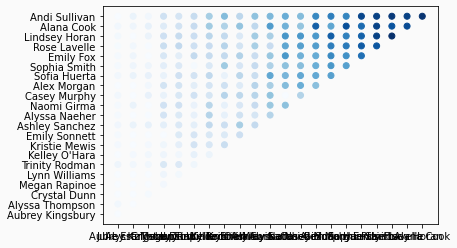

In [6]:
# Setup
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

df_sub = df[df["minutes_p1"] > df["minutes_p2"]]
ax.scatter(df_sub["p2"], df_sub["p1"], c=df_sub["minutes"], cmap="Blues")

In [12]:
curved = True


def plot_circle(player):
    # Setup
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)
    ax.set_facecolor(Colors.WHITE)

    R = 1
    locs = {}
    inds = {}

    # Draw players
    for i, p in enumerate(sorted(df_mins["p1"])):
        angle = i / len(df_mins.index) * 2 * math.pi
        x = math.sin(angle) * R
        y = math.cos(angle) * R
        locs[p] = (x, y)
        inds[p] = i
        ax.text(
            x * 1.1,
            y * 1.1,
            p.replace(" ", "\n"),
            ha="center",
            va="center",
            fontproperties=Fonts.BARLOW,
        )
        ax.scatter([x], [y], color="#3c4878", s=3)

    # Draw lines
    for i, row in df[df["p1"] > df["p2"]].iterrows():
        if row["p2"] != row["p1"] and (
            not player or row["p1"] == player or row["p2"] == player
        ):
            p1 = locs[row["p1"]]
            p2 = locs[row["p2"]]

            if curved:
                dist = min(
                    (inds[row["p1"]] - inds[row["p2"]]) % len(df_mins.index),
                    (inds[row["p2"]] - inds[row["p1"]]) % len(df_mins.index),
                )
                clockwise = (
                    (inds[row["p1"]] - inds[row["p2"]]) % len(df_mins.index)
                ) > ((inds[row["p2"]] - inds[row["p1"]]) % len(df_mins.index))
                angle = str(1 / (2 * dist))
                sign = "" if clockwise else "-"
                connectionstyle = "arc3,rad=" + sign + angle
                ax.add_patch(
                    patches.FancyArrowPatch(
                        (p1[0], p1[1]),
                        (p2[0], p2[1]),
                        arrowstyle="-",
                        connectionstyle=connectionstyle,
                        lw=1.5,
                        clip_on=False,
                        color="#3c4878",
                        alpha=row["minutes"] / 1400,
                    )
                )
            else:
                ax.plot(
                    [p1[0], p2[0]],
                    [p1[1], p2[1]],
                    lw=2,
                    alpha=row["minutes"] / 1400,
                    color="#3c4878",
                )

    # Set axes
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.axis("off")

    # Title
    ax.set_title(
        "USWNT Pairwise Minutes" + (": " + player if player else ""),
        fontproperties=Fonts.BARLOW_BOLD,
        size=24,
        ha="left",
        x=0,
        y=1.07,
    )

    subtitle = "Each line represents shared minutes between two players since the last\nOlympics. Darker lines represent more minutes played together."
    if player:
        minutes = df_mins[df_mins["p1"] == player].iloc[0]["minutes"]
        subtitle = (
            player
            + " has played a total of "
            + f"{minutes:,}"
            + " minutes since the last Olympics. Here are\nthe players she shared the most minutes with."
        )

    # Subtitle
    ax.text(
        -1.2,
        1.2,
        subtitle,
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
    )

    # Twitter logo and username
    add_twitter_handle(fig, x=0.78, y=0.09, fs=14, w=0.02)

    filename = "all" if not player else player.split(" ")[1].lower()
    plt.savefig(
        "images/uswnt_pairs_circle_" + filename + ".png",
        bbox_inches="tight",
        transparent=False,
        pad_inches=0.5,
        dpi=200,
    )


<Figure size 4000x4000 with 0 Axes>

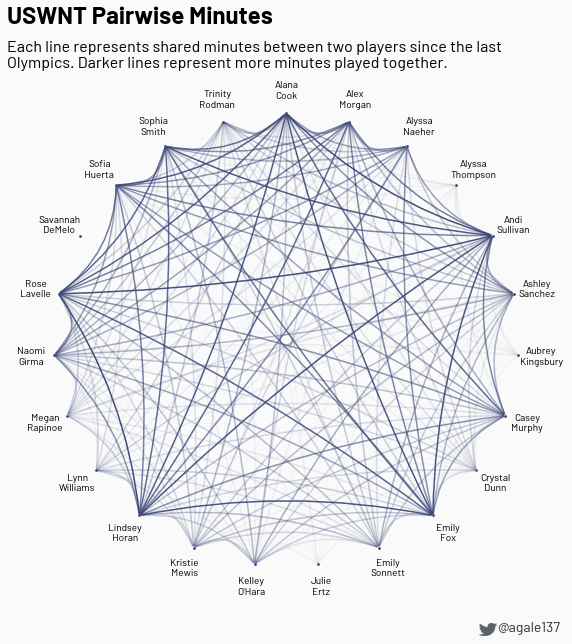

In [13]:
plot_circle(None)

<ipython-input-12-827f83002e6f>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=400)


<Figure size 4000x4000 with 0 Axes>

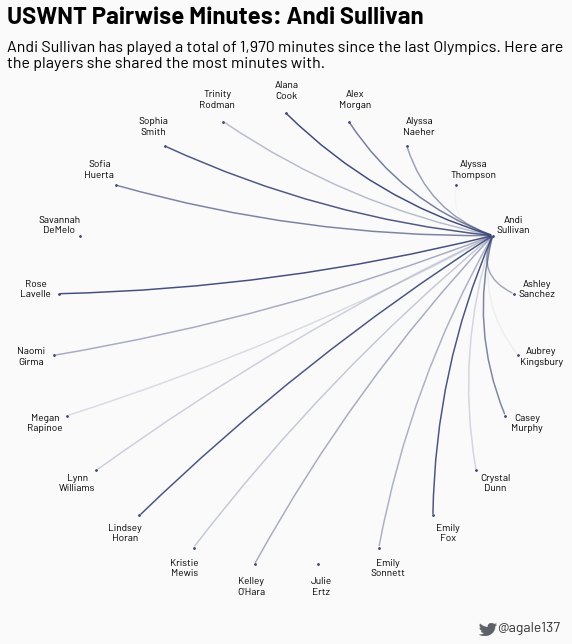

<Figure size 4000x4000 with 0 Axes>

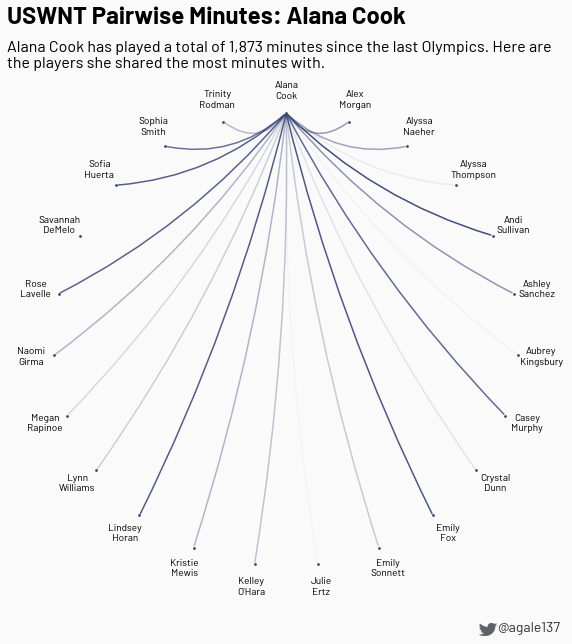

<Figure size 4000x4000 with 0 Axes>

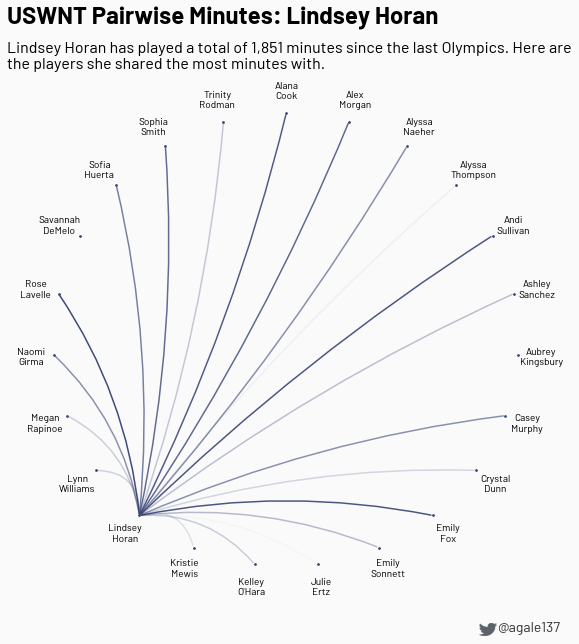

<Figure size 4000x4000 with 0 Axes>

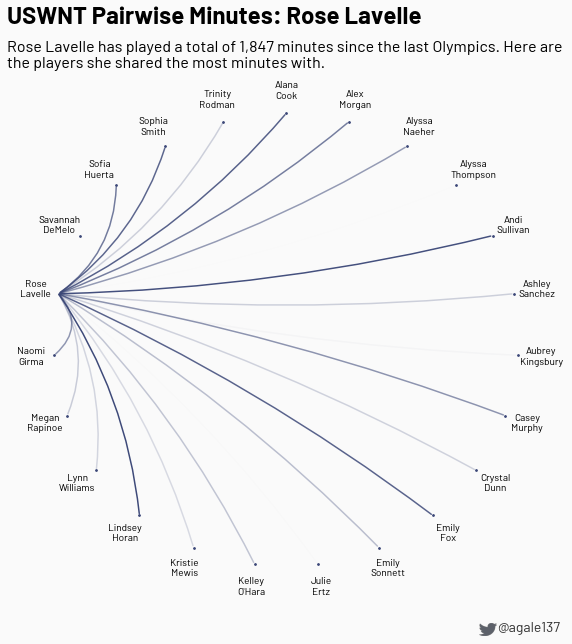

<Figure size 4000x4000 with 0 Axes>

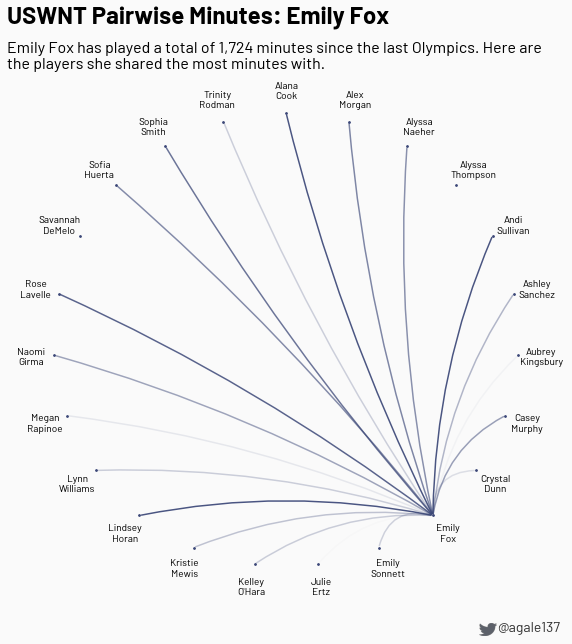

<Figure size 4000x4000 with 0 Axes>

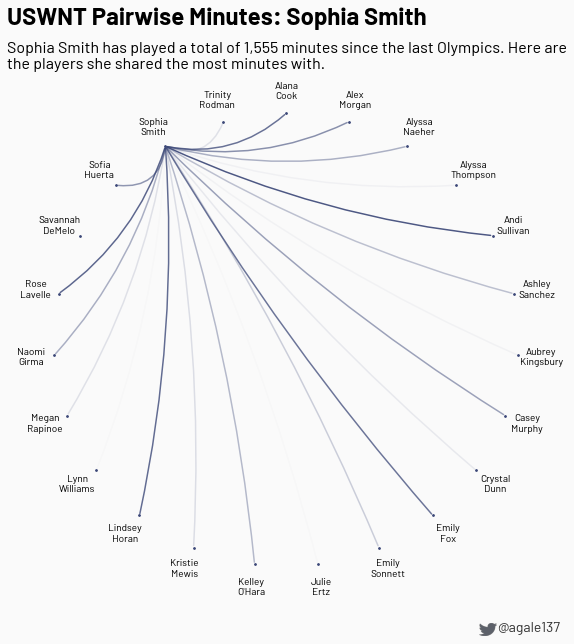

<Figure size 4000x4000 with 0 Axes>

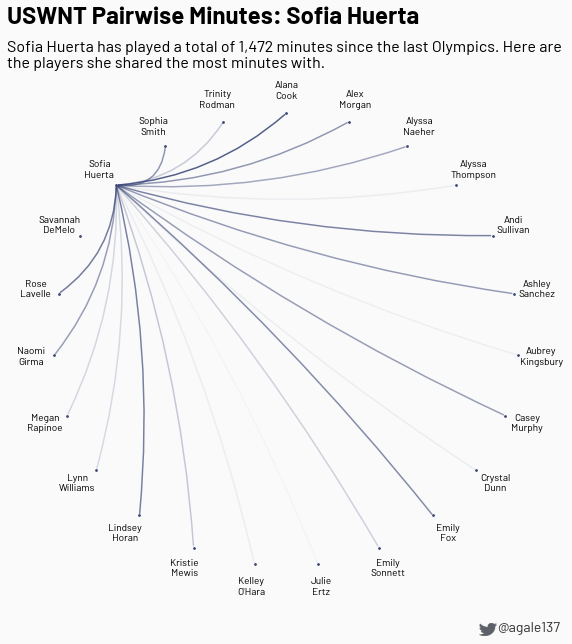

<Figure size 4000x4000 with 0 Axes>

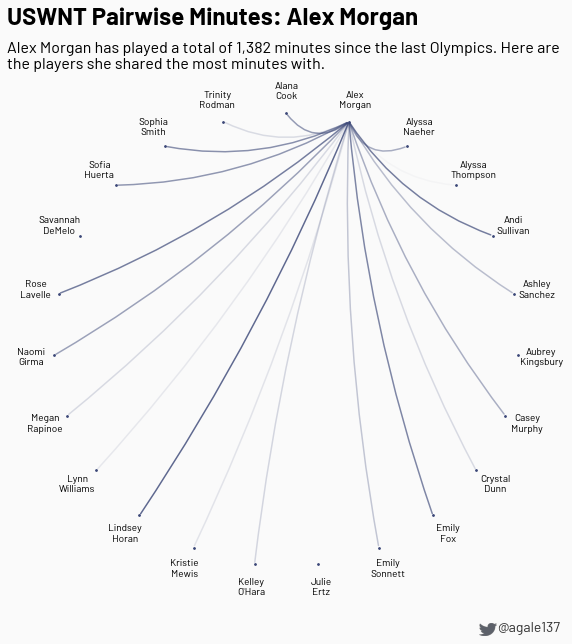

<Figure size 4000x4000 with 0 Axes>

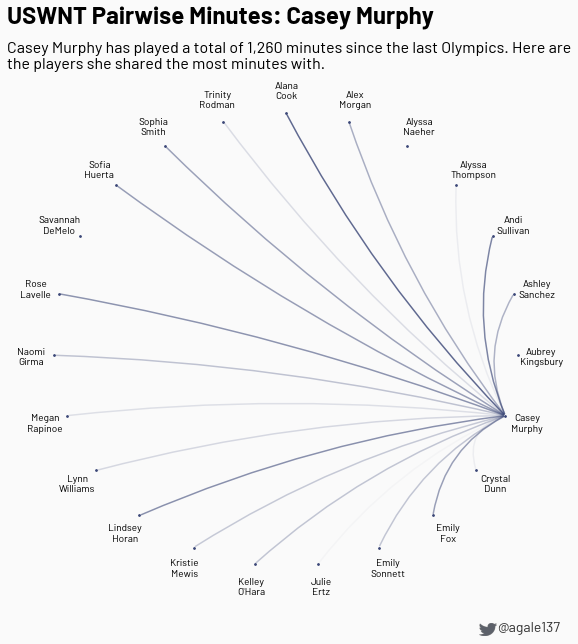

<Figure size 4000x4000 with 0 Axes>

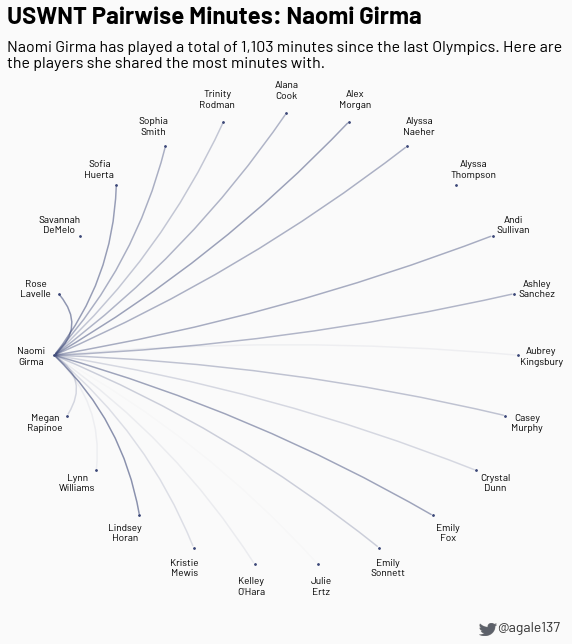

<Figure size 4000x4000 with 0 Axes>

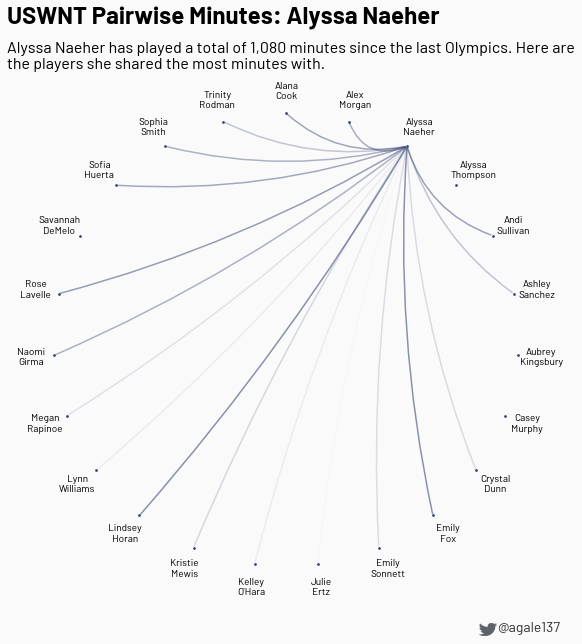

<Figure size 4000x4000 with 0 Axes>

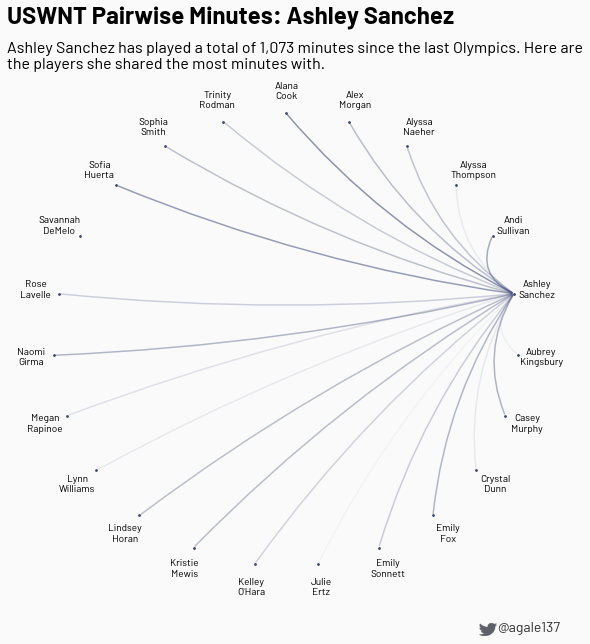

<Figure size 4000x4000 with 0 Axes>

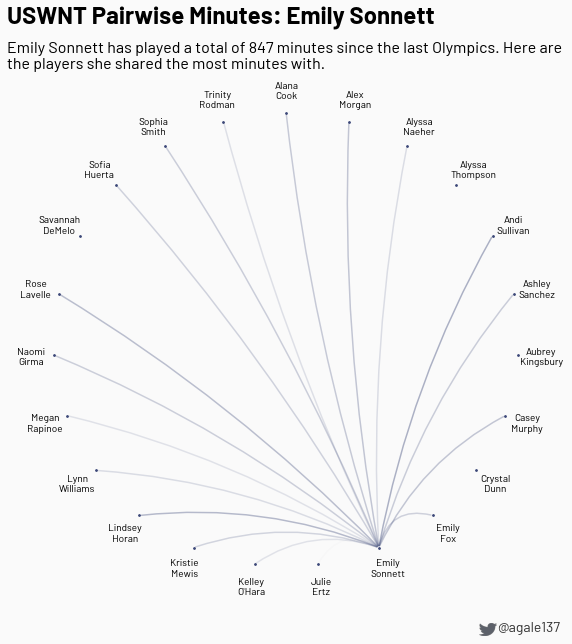

<Figure size 4000x4000 with 0 Axes>

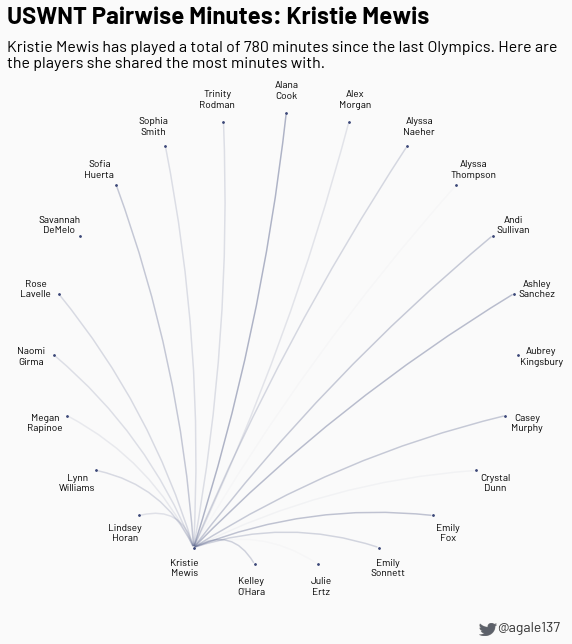

<Figure size 4000x4000 with 0 Axes>

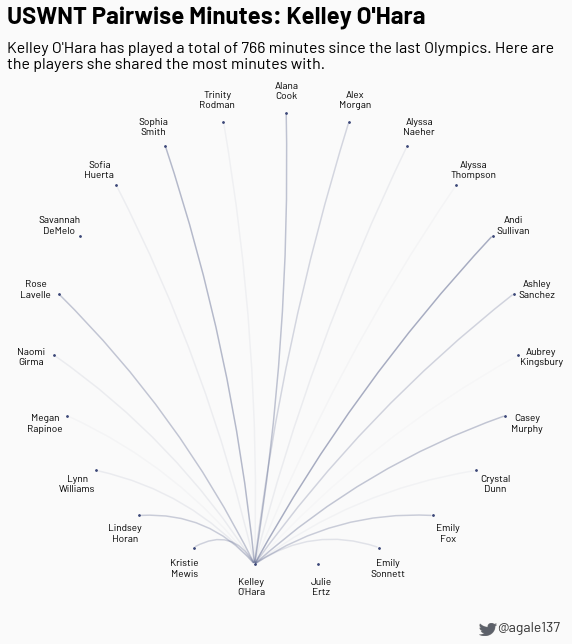

<Figure size 4000x4000 with 0 Axes>

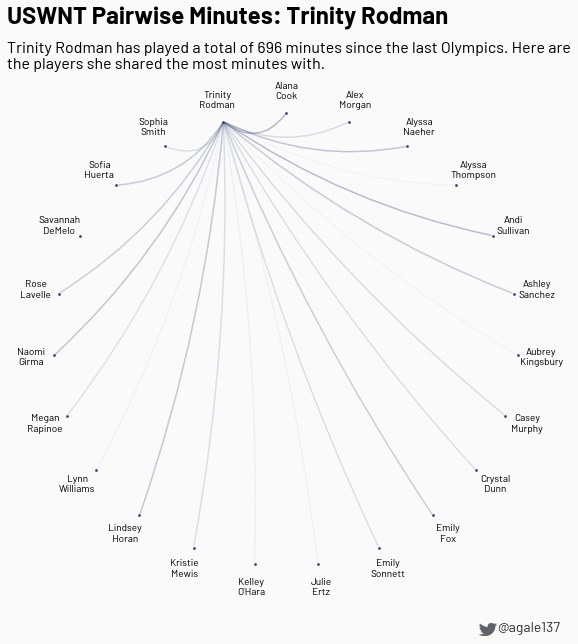

<Figure size 4000x4000 with 0 Axes>

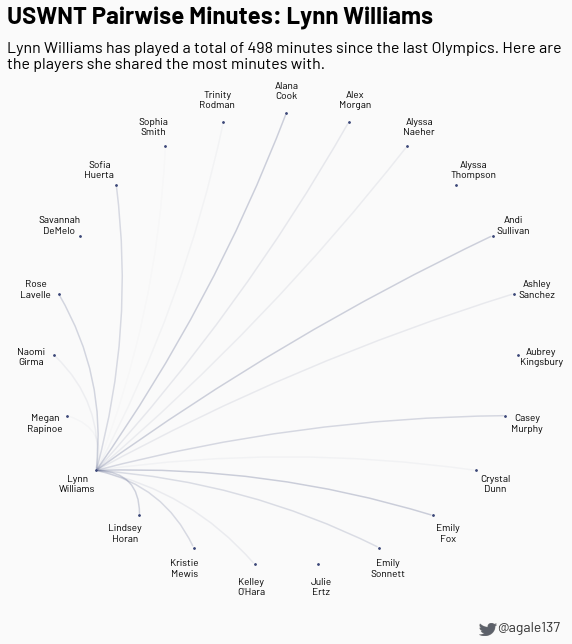

<Figure size 4000x4000 with 0 Axes>

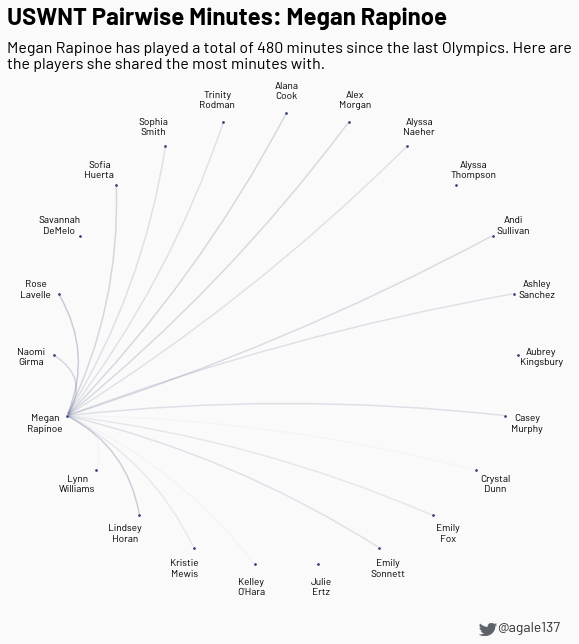

<Figure size 4000x4000 with 0 Axes>

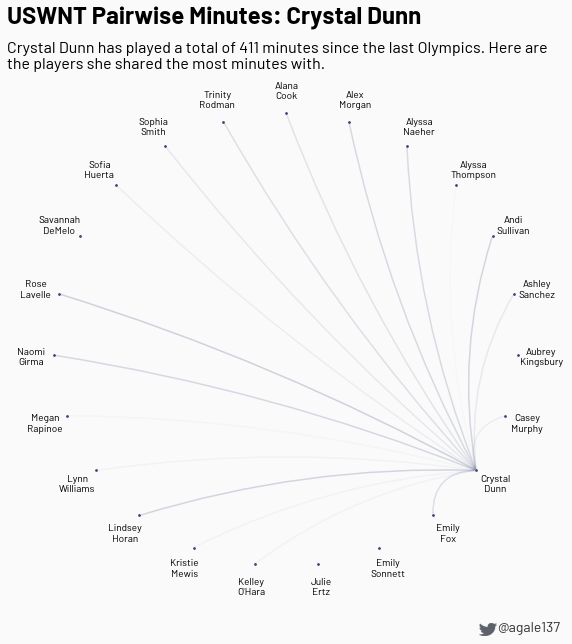

<Figure size 4000x4000 with 0 Axes>

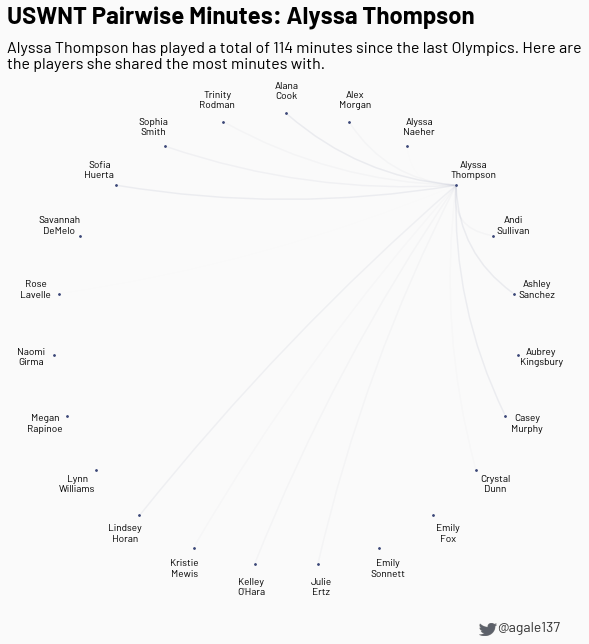

<Figure size 4000x4000 with 0 Axes>

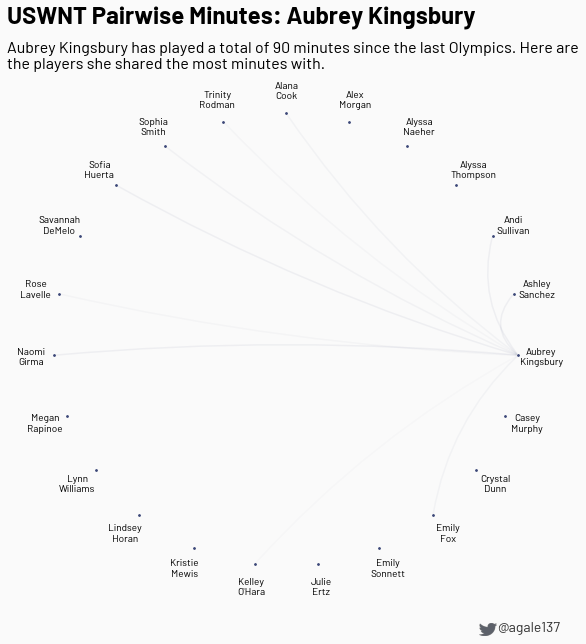

<Figure size 4000x4000 with 0 Axes>

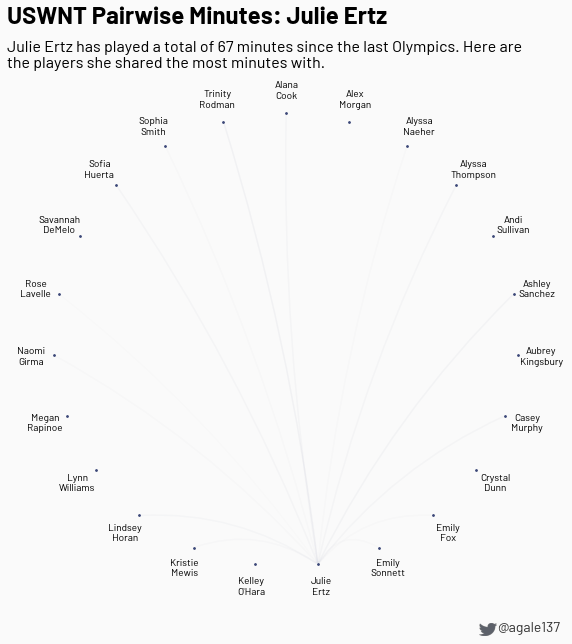

<Figure size 4000x4000 with 0 Axes>

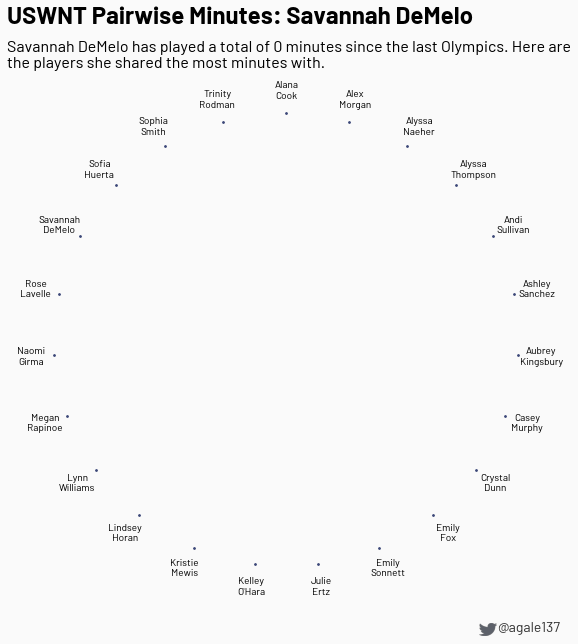

In [14]:
for player in df_mins["p1"]:
    plot_circle(player)